In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import ecopy as ep
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

In [43]:
from sklearn.cluster import AffinityPropagation, KMeans, estimate_bandwidth, MeanShift

In [9]:
df = pd.read_csv("C:/Python/temp_data.csv", sep=";")
x = df.iloc[1:, 1:].values
x = StandardScaler().fit_transform(x)

In [13]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf['names'] = df.track_name

Finished at iteration 2. Stress = 0.25585132299193775
Finished at iteration 25. Stress = 0.24295103127187156
Finished at iteration 52. Stress = 0.2873114646361426
Finished at iteration 9. Stress = 0.41036180222371305
Finished at iteration 47. Stress = 0.2270954301831587
Finished at iteration 24. Stress = 0.32450976815346316
Finished at iteration 9. Stress = 0.4104802997165832
Finished at iteration 40. Stress = 0.26153442580584857
Finished at iteration 28. Stress = 0.34419382570419593
Finished at iteration 9. Stress = 0.41039176917961045
Finished at iteration 9. Stress = 0.41065118871740136
Finished at iteration 8. Stress = 0.41039661109399506
Finished at iteration 9. Stress = 0.41033262340995486
Finished at iteration 37. Stress = 0.23757305541351958
Finished at iteration 38. Stress = 0.2473408350553817
Finished at iteration 39. Stress = 0.2768235257124892
Finished at iteration 9. Stress = 0.4102681737120655
Finished at iteration 9. Stress = 0.4094752325860173
Finished at iteration 52. 

Text(0.5, 1.0, 'Estimated number of clusters: 3')

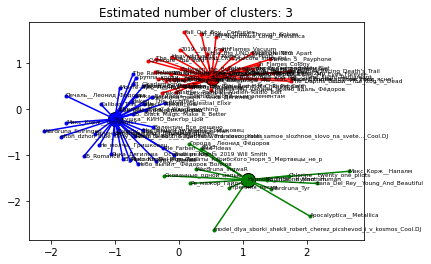

In [24]:
dunes = df.iloc[1:, 1:].values**2
dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'bray')
dunesMDS = ep.MDS(dunes_D)
names = df['track_name'].values
massive = dunesMDS.scores

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for i in enumerate(names):
    plt.text(massive[i[0] - 1][0], massive[i[0] - 1][1], names[i[0]], size="xx-small")
    
### AFINITY POROP

af = AffinityPropagation(preference=-50).fit(massive)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = massive[cluster_centers_indices[k]]
    plt.plot(massive[class_members, 0], massive[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in massive[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)

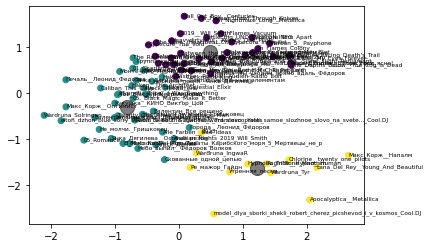

In [30]:
### K-MEANS
for i in enumerate(names):
    plt.text(massive[i[0] - 1][0], massive[i[0] - 1][1], names[i[0]], size="xx-small")

kmeans = KMeans(n_clusters = 3)
kmeans.fit(massive)
y_kmeans = kmeans.predict(massive)
plt.scatter(massive[:, 0], massive[:, 1], c = y_kmeans, cmap = 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)

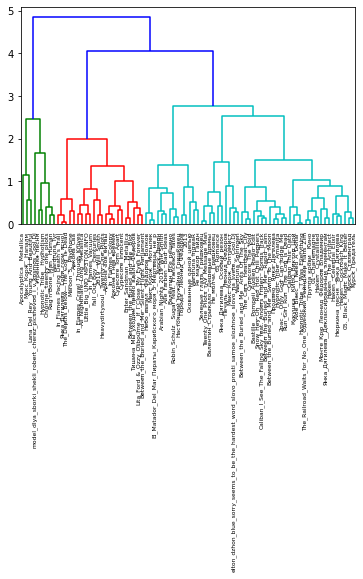

In [38]:
### IERARCHY
from scipy.cluster.hierarchy import linkage, dendrogram


mergings = linkage(massive, method='complete')
dendrogram(mergings, labels=names)
plt.show()

Text(0.5, 1.0, 'Estimated number of clusters: 3')

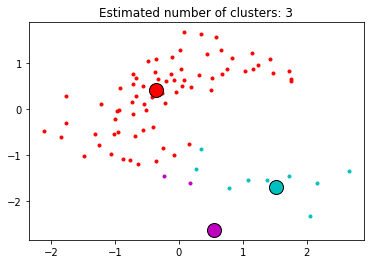

In [48]:
### MEANSHIFT

bandwidth = estimate_bandwidth(massive, quantile=0.2, n_samples=100)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(massive)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(massive[my_members, 0], massive[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)